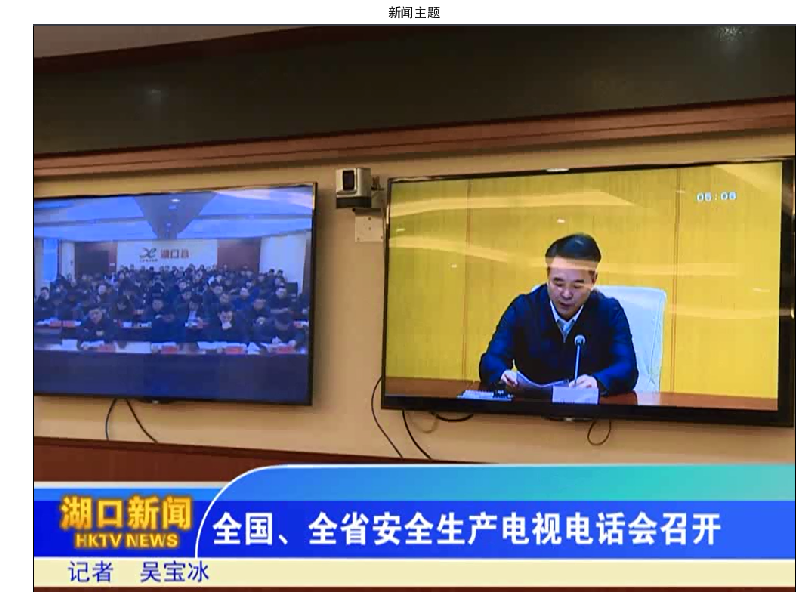

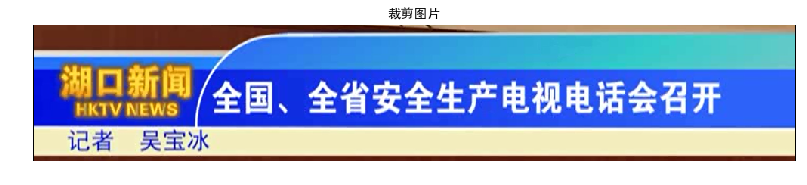

txt 0:湖口新闻

txt 2:HKTV NEWS

txt 1:全国、全省安全生产电视电话会召开

txt 3:记者吴宝冰



In [2]:
#coding:utf-8
%matplotlib inline
import matplotlib.pyplot as plt 
from PIL import Image
import io
import base64

import requests
import hashlib
import urllib.parse 

import json

_DEBUG = False

def md5(str):
    m = hashlib.md5()
    m.update(str.encode("utf8"))
    return m.hexdigest()

from io import BytesIO
def pil_base64(image):    
    img_buffer = BytesIO()    
    image.save(img_buffer, format='PNG')    
    byte_data = img_buffer.getvalue()    
    base64_str = base64.b64encode(byte_data)    
    return base64_str.decode()

def base64_pil(base64_str):    
    image = base64.b64decode(base64_str)    
    image = BytesIO(image)    
    image = Image.open(image)    
    return image

def display_img(img,title):
    plt.figure(figsize=(img.size[0]/80,img.size[1]/80),dpi=80)

    plt.imshow(img)
    plt.axis('off') # 关掉坐标轴为 off
    plt.title(title) # 图像题目
    plt.show()

url = "http://deepi.sogou.com:80/api/sogouService"  #请求的接口地址
pid = "2a3fedc02a891ac45e47e7db5e5f7d98"     #平台分配的PID，可前往用户中心申请
key = "aa568f485f9c96033a279857e379776b"     #平台分配的key，可前往用户中心申请
service = "basicOpenOcr"    #通用服务的名称
salt = "1508404016012"      #随机数，可以填入时间戳


ImageFile = "湖口新闻-主题字幕3.png"

with open(ImageFile, 'rb') as f:
    #image_base64_str = base64.b64encode(f.read())
    base64_data = base64.b64encode(f.read())
    image_base64_str = base64_data.decode()
    if _DEBUG:    
        print(f'data:image base64 size:{len(image_base64_str)}')

#"""    
#输出图片    
img = base64_pil(image_base64_str)
if _DEBUG:
    print(img.size)

display_img(img,u'新闻主题')

cropped_img = img.crop((0, int(img.size[1]*0.76), img.size[0], img.size[1]))  # (left, upper, right, lower)

#输出裁剪图片
display_img(cropped_img,u'裁剪图片')

image_base64_str = pil_base64(cropped_img)


imageShort = image_base64_str[0:1024]
sign = md5(pid+service+salt+imageShort+key); 

if _DEBUG:
    print(sign)
    
lang = "zh-CHS"     #识别语言，默认为zh-CHS，可查看语种列表替换语种代码
payload = "lang=" + lang + "&pid=" + pid + "&service=" + service + "&sign=" + sign + "&salt=" + salt + "&image=" + urllib.parse.quote(image_base64_str)
headers = {
    'content-type': "application/x-www-form-urlencoded",
    'accept': "application/json"
    }
response = requests.request("POST", url, data=payload, headers=headers)

if _DEBUG:
    print(response.text)
    
rsp_json=json.loads(response.text)

if(rsp_json["success"]) == 1:
    for result in rsp_json["result"]:
        groupID = result["groupID"]
        content = result["content"]
        
        print(f"txt {groupID}:{content}")
else:
    print("fail.")
    
